# Cx1115 : Programming Quiz : Sample

In [26]:
# Import the complete dataset "train.csv" into Jupyter
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics

measureData = pd.read_csv('ProgrammingQuiz_Dataset.csv')
measureData.head()

,Height,Weight,Diameter,Length
0,0.135,0.6770,0.420,0.530
1,0.150,0.7775,0.415,0.530
2,0.125,0.7680,0.425,0.545
3,0.150,0.8945,0.440,0.550
4,0.140,0.6065,0.380,0.525


## Problem 1 : Exploratory Analysis

#### Print the overall statistical description of the data and plot standard statistical distributions for each variable.

In [27]:
measureData.describe()

,Height,Weight,Diameter,Length
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.138874,0.819623,0.406095,0.521759
std,0.042092,0.489400,0.099668,0.120595
min,0.000000,0.002000,0.055000,0.075000
25%,0.110000,0.433500,0.345000,0.450000
50%,0.140000,0.787750,0.420000,0.540000
75%,0.165000,1.144500,0.480000,0.615000
max,1.130000,2.825500,0.650000,0.815000


<AxesSubplot:>

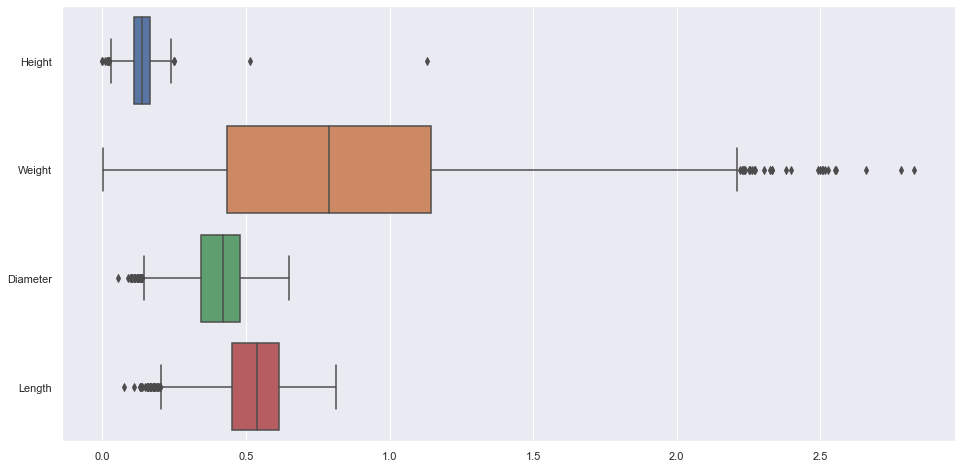

In [28]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = measureData, orient = "h")

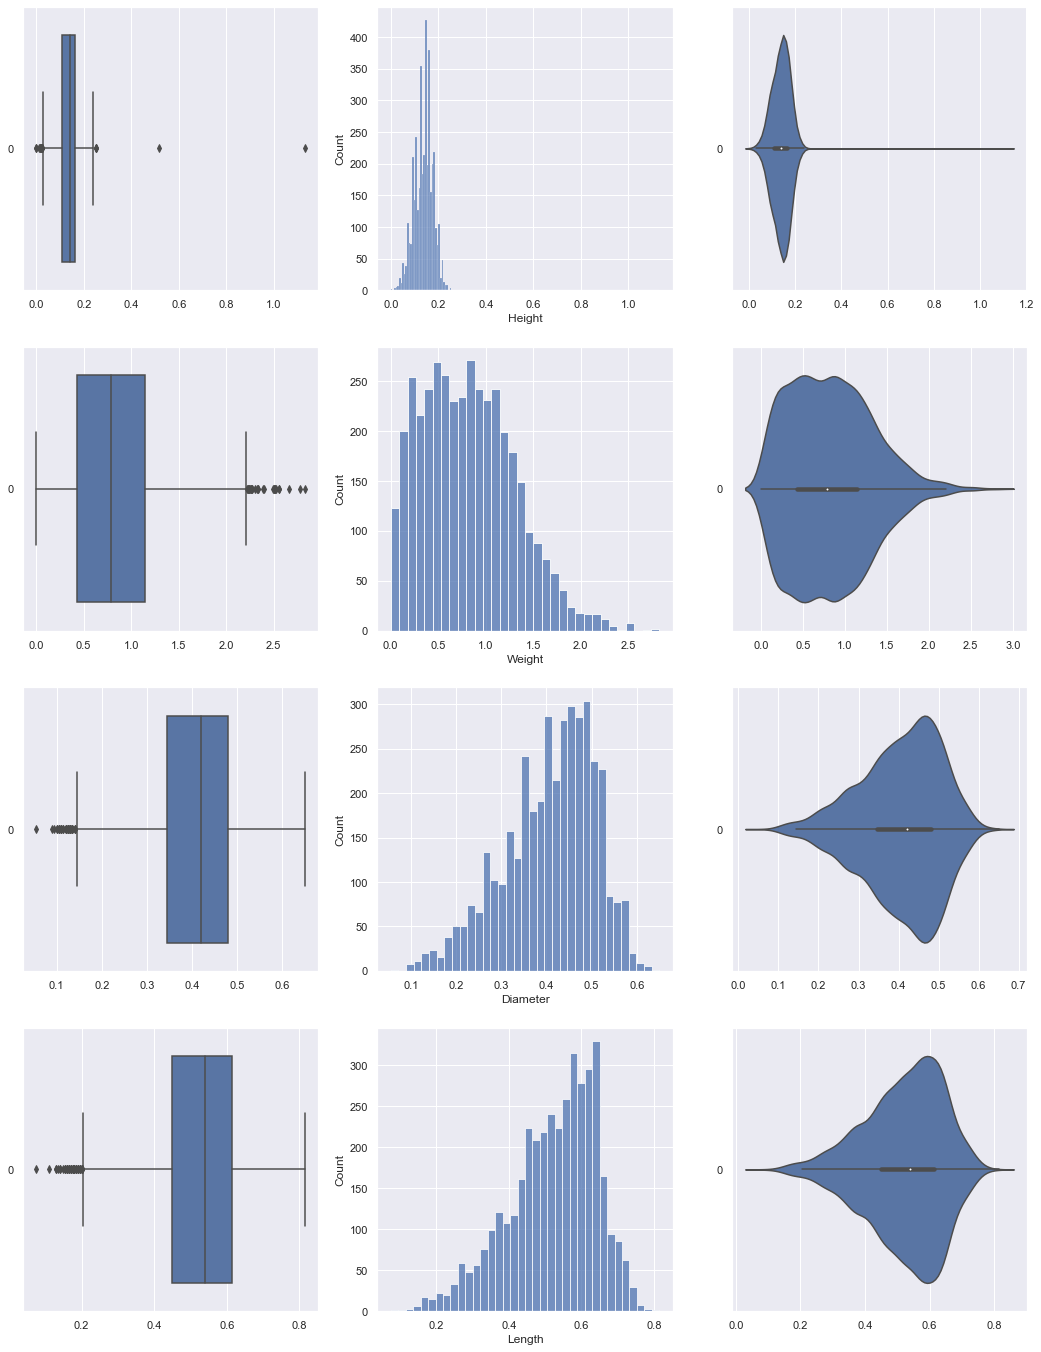

In [29]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 24))

count = 0
for var in measureData:
    sb.boxplot(data = measureData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = measureData[var], ax = axes[count,1])
    sb.violinplot(data = measureData[var], orient = "h", ax = axes[count,2])
    count += 1

In [30]:
# Calculate number of outliers 
df = pd.DataFrame(measureData)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("Number of outliers for each variable:")
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Number of outliers for each variable:


Height      17
Weight      27
Diameter    43
Length      49
dtype: int64

#### Comments: 
`Height` seems to have the most "Normal" distritution as it's median and mean are have the smallest difference between each other, . It also has the least number of outliers.

As it can be seen from the data above, `Length` has the maximum number of outliers with 49 outliers

#### Print the mutual correlation amongst all the variables using a correlation heatmap

In [31]:
# Calculate the correlation between the two columns/variables
df.corr()

,Height,Weight,Diameter,Length
Height,1.000000,0.817782,0.831975,0.825734
Weight,0.817782,1.000000,0.925831,0.925393
Diameter,0.831975,0.925831,1.000000,0.987054
Length,0.825734,0.925393,0.987054,1.000000


<AxesSubplot:>

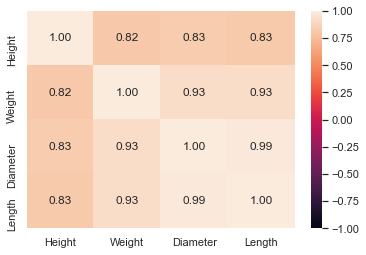

In [32]:
sb.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

#### Comments:
`Diameter` has the highest absolute correlation with Length with a correlation score of 0.99. It is a very strong correlation and is helpful in predicting Length.

## Problem 2 : Uni-Variate Linear Regression

#### Length VS Height

Train Set : (2800, 1) (2800, 1)
Test Set  : (1200, 1) (1200, 1)

Intercept of Regression 	: b =  [0.2091864]
Coefficients of Regression 	: a =  [[2.25781823]]



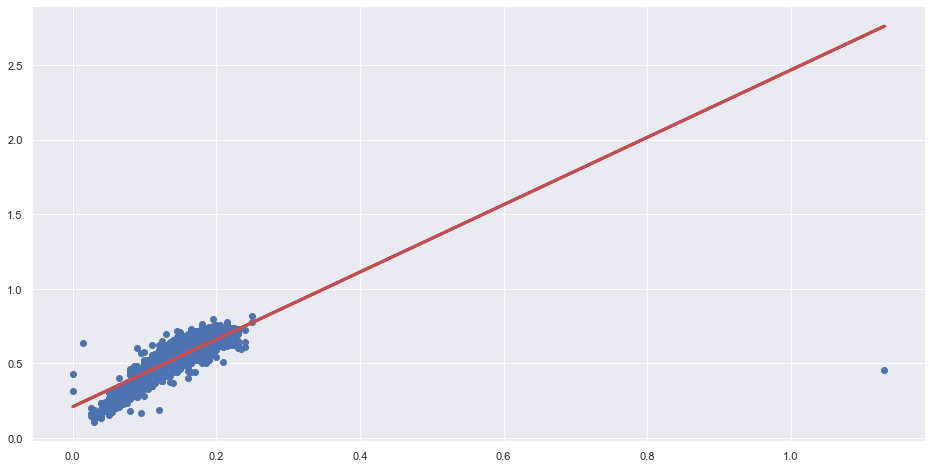

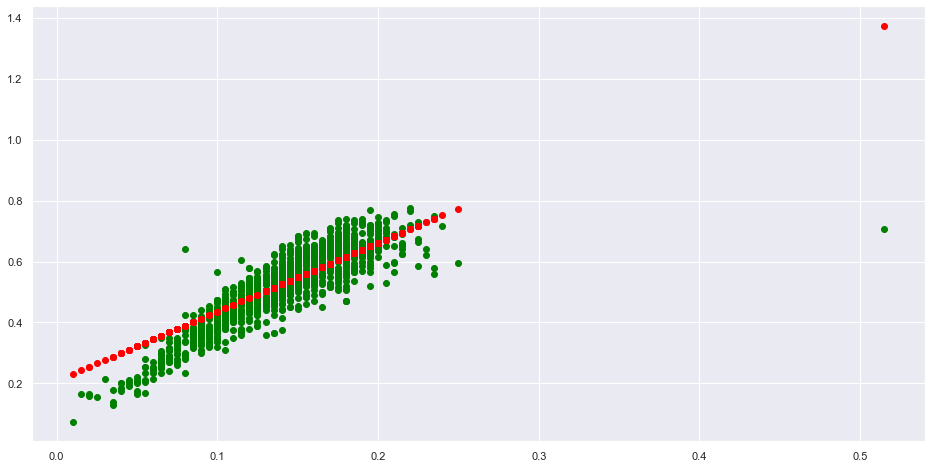

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6479727181922641
Mean Squared Error (MSE) 	: 0.005054075154177616

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.752827437395347
Mean Squared Error (MSE) 	: 0.0036990913286667096



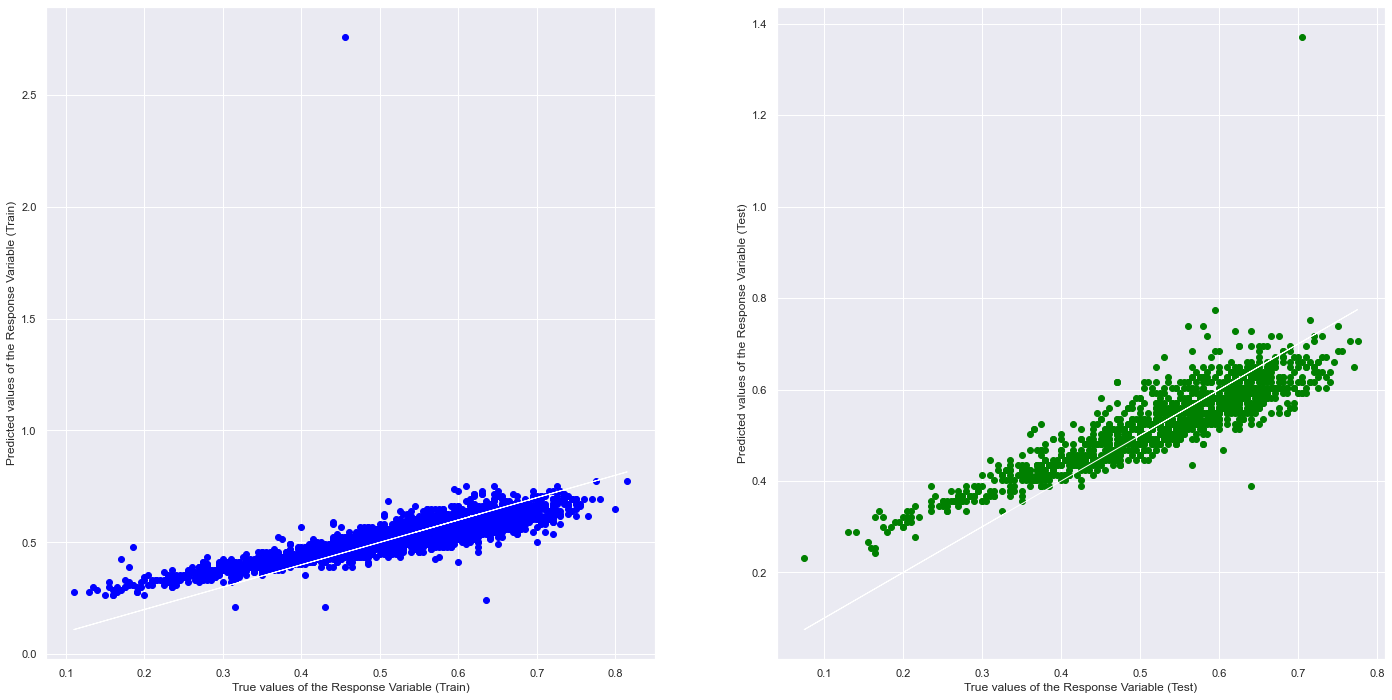

In [33]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the Total-HP Dataset
length = pd.DataFrame(measureData['Length'])   # Response
height = pd.DataFrame(measureData['Height'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(height, length, test_size = 0.30)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)
print()

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Predict SalePrice values corresponding to Predictor
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Length VS Weight

Train Set : (2800, 1) (2800, 1)
Test Set  : (1200, 1) (1200, 1)

Intercept of Regression 	: b =  [0.33501619]
Coefficients of Regression 	: a =  [[0.22785785]]



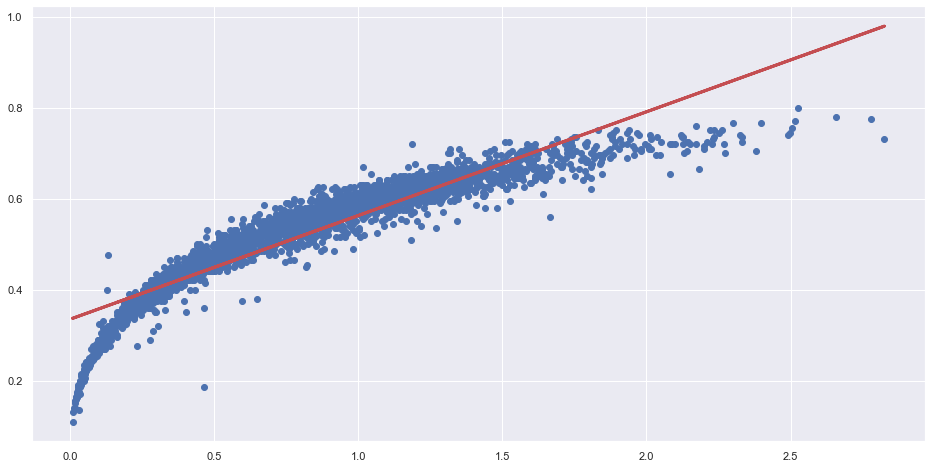

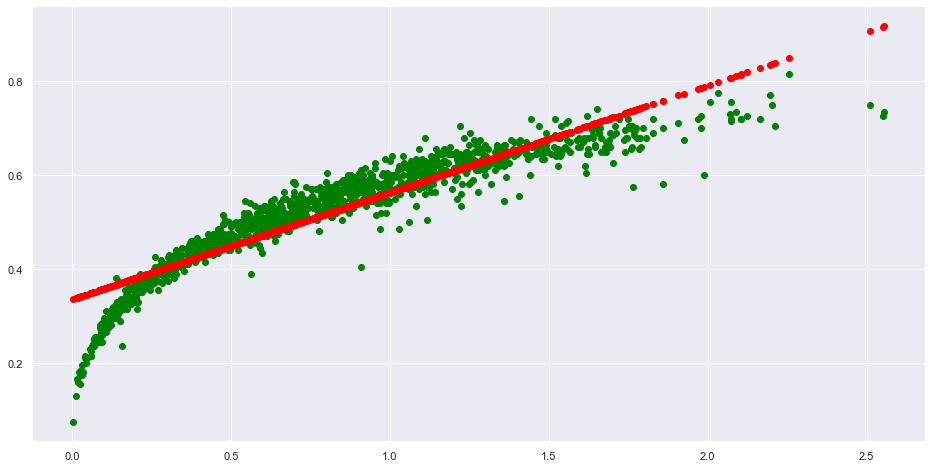

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8560172756257386
Mean Squared Error (MSE) 	: 0.002096704244511182

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8571010241424553
Mean Squared Error (MSE) 	: 0.0020696527039726887



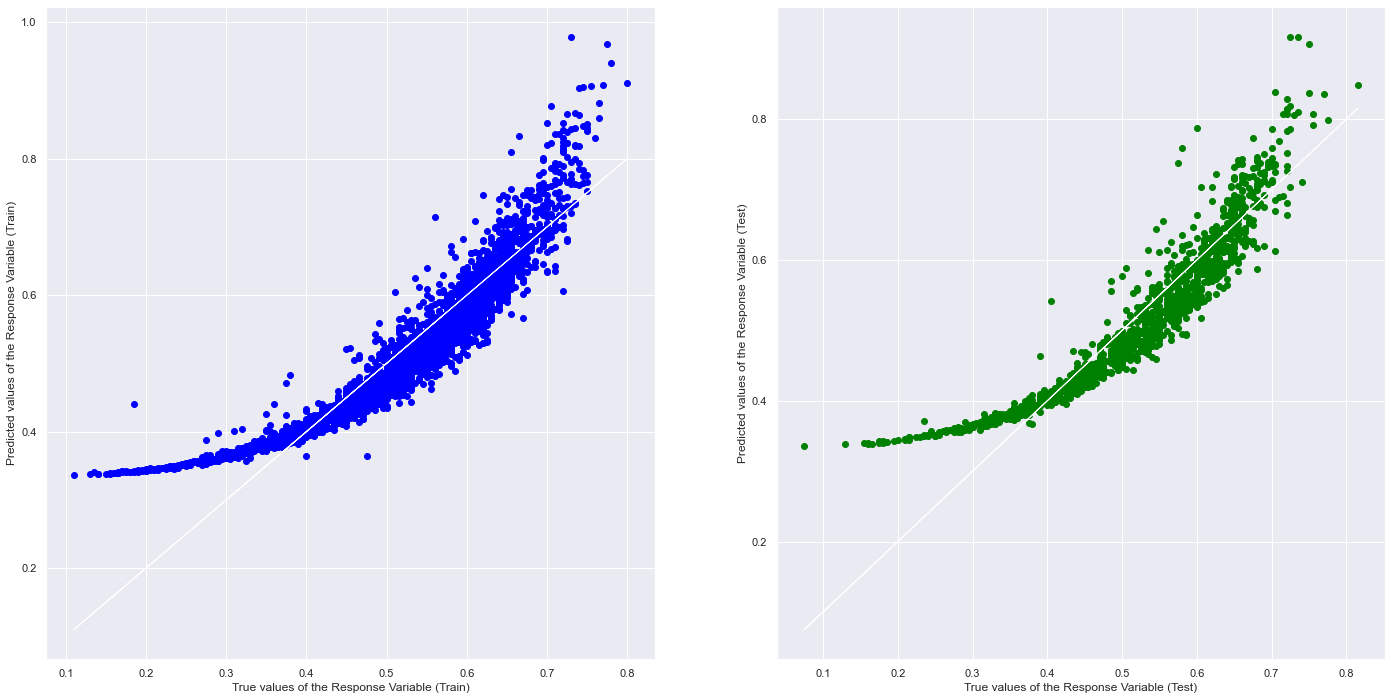

In [34]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the Total-HP Dataset
length = pd.DataFrame(measureData['Length'])   # Response
weight = pd.DataFrame(measureData['Weight'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(weight, length, test_size = 0.30)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)
print()

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Predict SalePrice values corresponding to Predictor
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Length VS Diameter

Train Set : (2800, 1) (2800, 1)
Test Set  : (1200, 1) (1200, 1)

Intercept of Regression 	: b =  [0.0364495]
Coefficients of Regression 	: a =  [[1.19462849]]



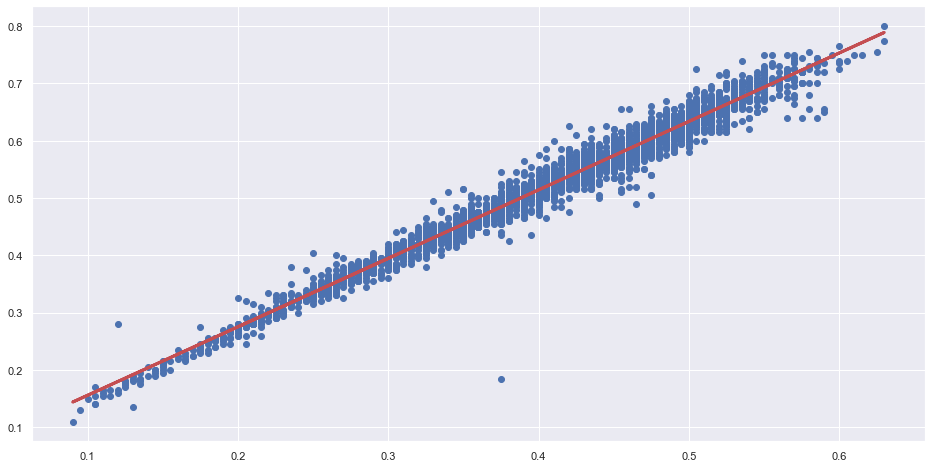

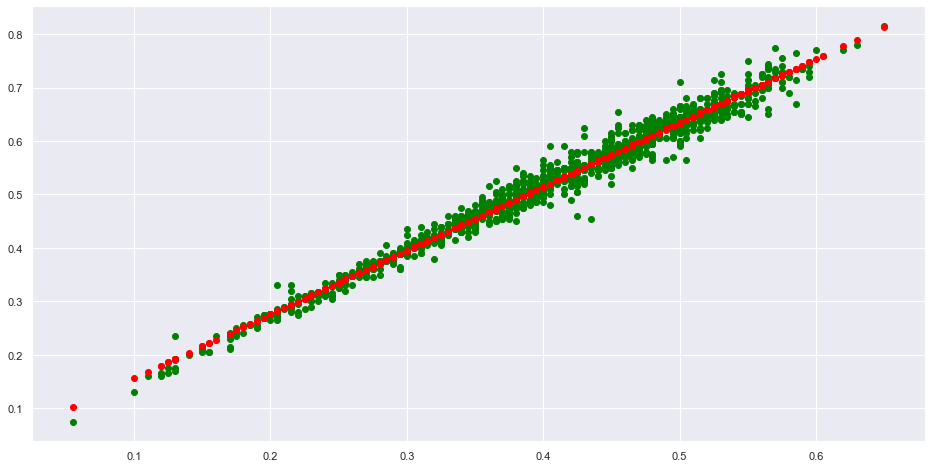

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9729099143426541
Mean Squared Error (MSE) 	: 0.0003967163932059119

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9775083955798377
Mean Squared Error (MSE) 	: 0.00032119087858505384



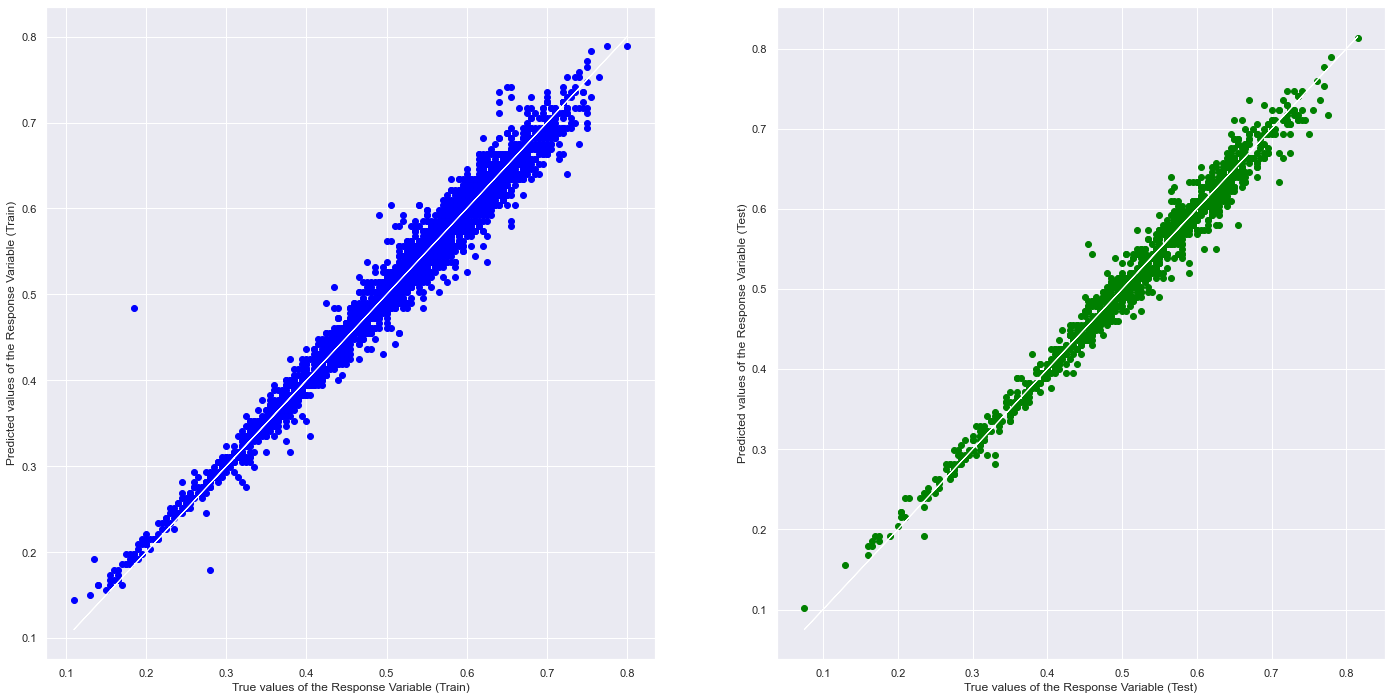

In [35]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the Total-HP Dataset
length = pd.DataFrame(measureData['Length'])   # Response
diameter = pd.DataFrame(measureData['Diameter'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(diameter, length, test_size = 0.30)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)
print()

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Predict SalePrice values corresponding to Predictor
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Comments: 
`Diameter` is the best in terms of predicting Length. 
This is because it has the best Explained Variance and lowest Mean Squared Error.

## Problem 3 : Multi-Variate Linear Regression

Intercept of Regression 	: b =  [0.05545344]
Coefficients of Regression 	: a =  [[0.00427721 0.01830049 1.10994536]]

  Predictors  Coefficients
0     Height      0.004277
1     Weight      0.018300
2   Diameter      1.109945



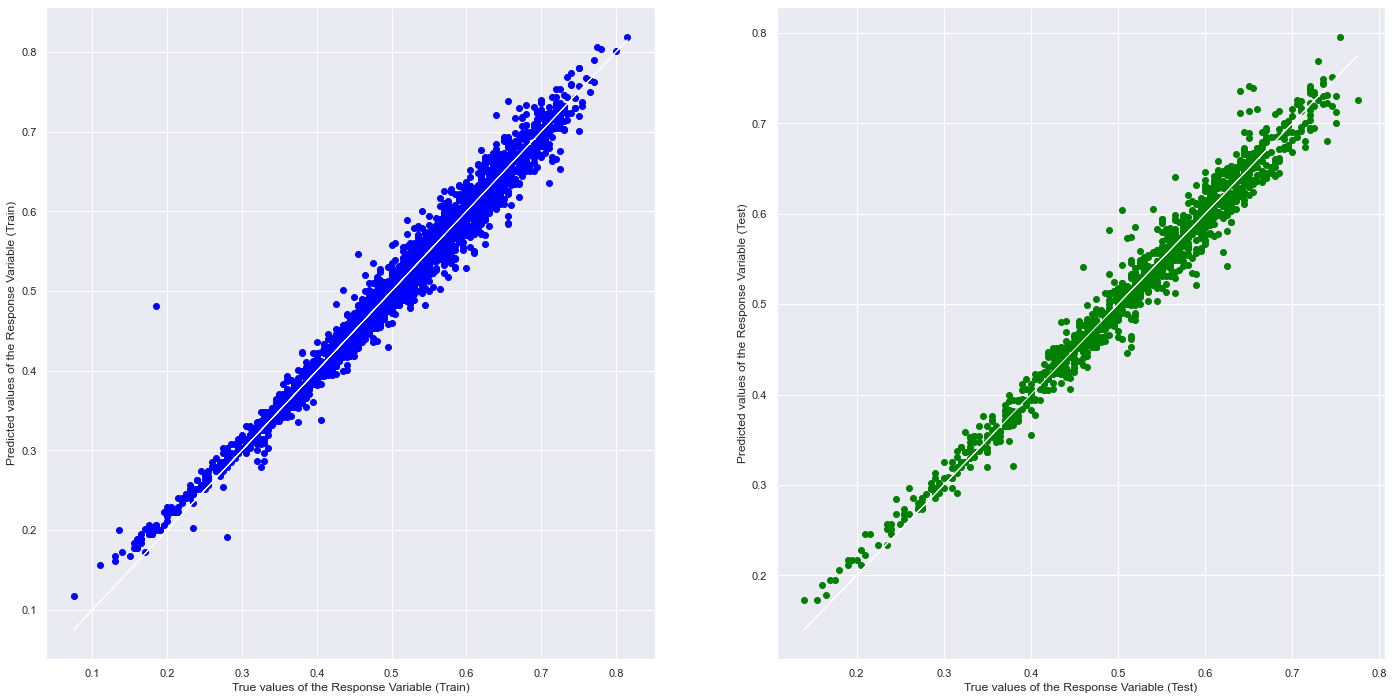

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9759540265169008
Mean Squared Error (MSE) 	: 0.00035731154752108

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9733044058358977
Mean Squared Error (MSE) 	: 0.00036797734187436727



In [36]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(measureData["Length"])
X = pd.DataFrame(measureData[["Height", "Weight", "Diameter"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()